In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [14]:
# q2: compute the allele frequencies
df_snp=pd.read_csv("matrix_1kg.txt", usecols=lambda column: column not in ["CHROM", "POS", "REF", "ALT"], sep="\t")


      HG00096  HG00097  HG00099  HG00100  HG00101  HG00102  HG00103  HG00104  \
0           0        0        0        0        0        0        0        0   
1           0        0        1        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
9995        0        0        0        0        0        0        0        0   
9996        0        0        0        0        0        0        0        0   
9997        0        0        0        0        0        0        0        1   
9998        0        0        0        0        0        0        0        0   
9999        0        0        0        0        0        0        0        0   

      HG00105  HG00106  ...  NA21128  N

Text(0.5, 1.0, 'Allele frequency histogram')

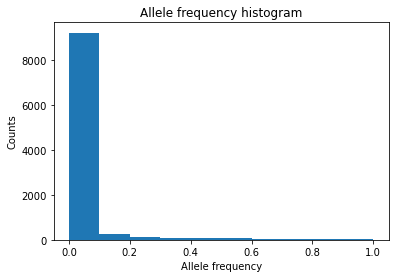

In [49]:
print(df_snp)
allele_count=np.sum(df_snp, axis=1)
print(allele_count)

# # check first column
# first_column = df_snp.iloc[:, 0]
# print(first_column)

# compute frequency
sample_size=df_snp.shape[1]
freq=np.divide(allele_count, 2*sample_size)

# plot allele by frequency
h=plt.hist(freq)
plt.xlabel("Allele frequency")
plt.ylabel("Counts")
plt.title("Allele frequency histogram")


In [66]:
# q3: filter out alleles with frequency beyond [0.05, 0.95]
d=dict(enumerate(freq))

keys=list(d.keys())
for k in keys:
    if d[k]<0.05 or d[k]>0.95:
        del d[k]

# check if any items have been removed at all
print(len(d))

# use the keys in the new dictionary to pick out the ones from the allele dataframe
filtered_snp=df_snp.iloc[list(d.keys())]


986


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [70]:
# q4: PCA based on genotypes

# transpose the matrix
pca_input=df_snp.T

print(pca_input.mean(axis=0))
print(pca_input.var(axis=0))

pca_input_standardized=StandardScaler().fit_transform(pca_input)

print(pca_input_standardized.mean(axis=0))
print(pca_input_standardized.var(axis=0))

pca = PCA(n_components=2)
pca_output=pca.fit_transform(pca_input_standardized)
pca_output

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64
0       0.000785
1       0.037782
2       0.006630
3       0.004300
4       0.000785
          ...   
9995    0.043452
9996    0.000392
9997    0.002741
9998    0.058311
9999    0.005078
Length: 10000, dtype: float64
[ 2.81174983e-16  8.04062032e-16 -6.15742413e-16 ... -3.13720792e-16
 -1.76030043e-15  8.90923477e-16]
[1. 1. 1. ... 1. 1. 1.]


array([[ -8.33942981, -10.42881129],
       [ -8.46123843, -10.32330774],
       [ -8.29420011,  -9.02375651],
       ...,
       [ -6.33274903,  -3.78076296],
       [ -8.61492143,  -2.74356121],
       [ -6.07966909,  -1.78564726]])

In [71]:
pca_output_df=pd.DataFrame(data=pca_output, columns=['PC1','PC2'])
pca_output_df

,PC1,PC2
0,-8.339430,-10.428811
1,-8.461238,-10.323308
2,-8.294200,-9.023757
3,-7.921072,-9.075279
4,-8.883854,-10.099697
...,...,...
2543,-8.045113,-0.478166
2544,-8.438440,-3.946042
2545,-6.332749,-3.780763
2546,-8.614921,-2.743561


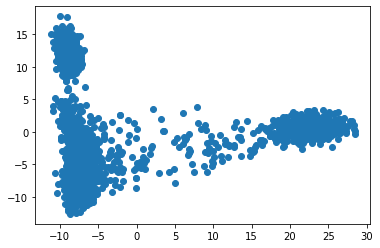

In [72]:
fig, ax =plt.subplots()
ax.scatter(x=pca_output_df['PC1'],y=pca_output_df['PC2'])